In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [2]:
from zipfile import ZipFile
file_name = "/content/multi_augmented.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
os.chdir('/content/multi_augmented/ECG')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,61):
      y.append('E')
      #y.append((i[0:1]))
      #print(i[0:1])

os.chdir('/content/multi_augmented/Prescription')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,331):
    y.append('P')

os.chdir('/content/multi_augmented/Report')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,469):
    y.append('R')

os.chdir('/content/multi_augmented/X-Ray')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,301):
    y.append('X')
print(y)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',

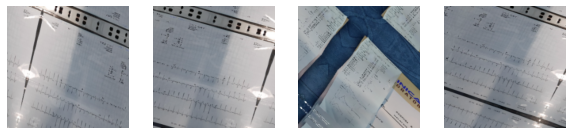

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [7]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [8]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (775, 224, 224, 3)
X_test Shape:  (383, 224, 224, 3)
y_train Shape:  (775, 4)
y_test Shape:  (383, 4)


In [9]:
from keras.applications.vgg19 import VGG19

In [10]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80134624/80134624 [==============================] - 6s 0us/step


In [11]:
vgg19.layers

In [12]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
for layer in vgg19.layers:
    layer.trainable = False

In [22]:
model = Sequential()
model.add(vgg19)

# Add the custom layers atop the VGG19 model: 
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax', name='predictions'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              25691136  
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                      

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
output_dir = 'model_output/transfer_VGG'

In [26]:
from keras.callbacks import ModelCheckpoint 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                 "/weights.{epoch:02d}.hdf5")

In [27]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [28]:
history=model.fit(X_train,y_train, batch_size=16,
                    epochs=10, 
                    validation_data=(X_test,y_test),
                    verbose = 1,  callbacks=[modelcheckpoint])

Epoch 1/10
49/49 [==============================] - 14s 228ms/step - loss: 0.6985 - accuracy: 0.7381 - val_loss: 0.3041 - val_accuracy: 0.8930
Epoch 2/10
49/49 [==============================] - 8s 167ms/step - loss: 0.3037 - accuracy: 0.9200 - val_loss: 0.1665 - val_accuracy: 0.9347
Epoch 3/10
49/49 [==============================] - 8s 165ms/step - loss: 0.2013 - accuracy: 0.9652 - val_loss: 0.1728 - val_accuracy: 0.9321
Epoch 4/10
49/49 [==============================] - 8s 165ms/step - loss: 0.1942 - accuracy: 0.9510 - val_loss: 0.1595 - val_accuracy: 0.9399
Epoch 5/10
49/49 [==============================] - 8s 167ms/step - loss: 0.1216 - accuracy: 0.9716 - val_loss: 0.1661 - val_accuracy: 0.9556
Epoch 6/10
49/49 [==============================] - 8s 168ms/step - loss: 0.0840 - accuracy: 0.9858 - val_loss: 0.1672 - val_accuracy: 0.9426
Epoch 7/10
49/49 [==============================] - 9s 176ms/step - loss: 0.0769 - accuracy: 0.9897 - val_loss: 0.1701 - val_accuracy: 0.9504
Epoch

In [29]:
model.load_weights(output_dir + '/weights.07.hdf5')

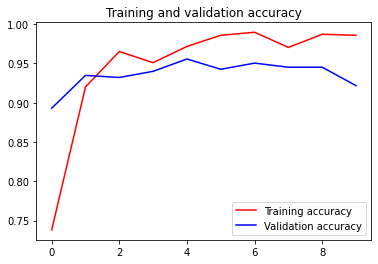

<Figure size 432x288 with 0 Axes>

In [30]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [32]:
response=[]
for i in range(383):
   test=X_test[i].reshape(1,224,224,3)
   response.append(np.argmax(model.predict(test)))

print(response)

1/1 [==============================] - 0s 16ms/step
[3, 1, 1, 1, 2, 1, 3, 2, 3, 2, 1, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 0, 1, 3, 1, 3, 3, 2, 1, 3, 3, 3, 2, 1, 2, 3, 3, 1, 3, 3, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 3, 2, 1, 2, 2, 2, 3, 2, 1, 2, 3, 0, 1, 2, 3, 2, 1, 2, 2, 3, 1, 1, 2, 2, 2, 3, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 1, 3, 2, 1, 3, 1, 3, 0, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 3, 2, 1, 2, 2, 1, 0, 3, 1, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 3, 1, 0, 3, 1, 2, 2, 2, 1, 3, 0, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 0, 1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 3, 0, 2, 2, 1, 2, 3, 2, 3, 2, 1, 3, 3, 1, 1, 1, 2, 2, 0, 0, 3, 1, 2, 1, 2, 2, 3, 3, 3, 2, 1, 3, 2, 3, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 3, 2,

In [33]:
res1=[]
for i in range(383):
  res1.append(np.argmax(y_test[i]))
print(res1)

[3, 1, 1, 1, 2, 1, 3, 2, 3, 2, 1, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 1, 3, 1, 3, 3, 2, 1, 3, 3, 3, 2, 1, 2, 3, 3, 1, 3, 3, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 3, 1, 1, 2, 2, 2, 3, 2, 1, 2, 3, 0, 1, 2, 3, 2, 1, 2, 2, 3, 1, 1, 2, 2, 2, 3, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2, 3, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 3, 2, 0, 3, 1, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 1, 1, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 3, 2, 1, 2, 2, 1, 0, 3, 2, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 3, 1, 0, 3, 1, 2, 2, 2, 1, 3, 0, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 0, 1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 3, 0, 2, 2, 1, 2, 3, 2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 2, 0, 0, 3, 1, 2, 1, 2, 2, 3, 3, 3, 2, 1, 3, 2, 3, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 1, 2, 1, 2, 1, 3, 1, 